In [3]:

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

#Read the data
df=pd.read_csv(r'C:\Users\HP\Desktop\supermarket_sales.csv')


In [4]:
df.head() 

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
# missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Invoice ID - 0%
Branch - 0%
City - 0%
Customer type - 0%
Gender - 0%
Product line - 0%
Unit price - 0%
Quantity - 0%
Tax 5% - 0%
Total - 0%
Date - 0%
Time - 0%
Payment - 0%
cogs - 0%
gross margin percentage - 0%
gross income - 0%
Rating - 0%


In [12]:
# Data Type
print(df.dtypes)

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


In [8]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [9]:
df.corr(method ='pearson')

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


In [10]:
df.corr(method ='spearman')

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.011167,0.630054,0.630054,0.630054,NaN,0.630054,-0.008335
Quantity,0.011167,1.000000,0.735265,0.735265,0.735265,NaN,0.735265,-0.015453
Tax 5%,0.630054,0.735265,1.000000,1.000000,1.000000,NaN,1.000000,-0.017226
Total,0.630054,0.735265,1.000000,1.000000,1.000000,NaN,1.000000,-0.017226
cogs,0.630054,0.735265,1.000000,1.000000,1.000000,NaN,1.000000,-0.017226
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.630054,0.735265,1.000000,1.000000,1.000000,NaN,1.000000,-0.017226
Rating,-0.008335,-0.015453,-0.017226,-0.017226,-0.017226,NaN,-0.017226,1.000000


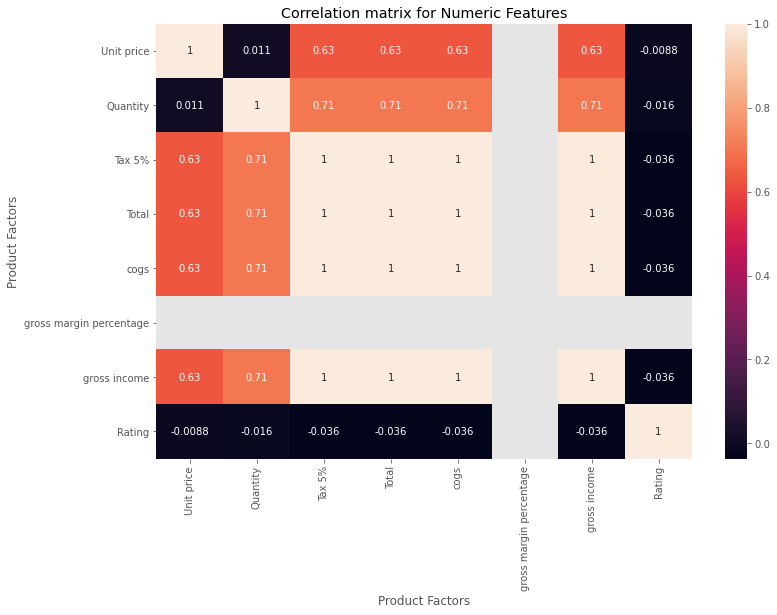

In [22]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Product Factors")

plt.ylabel("Product Factors")

plt.show()

(0.0, 1042.1415000000006)

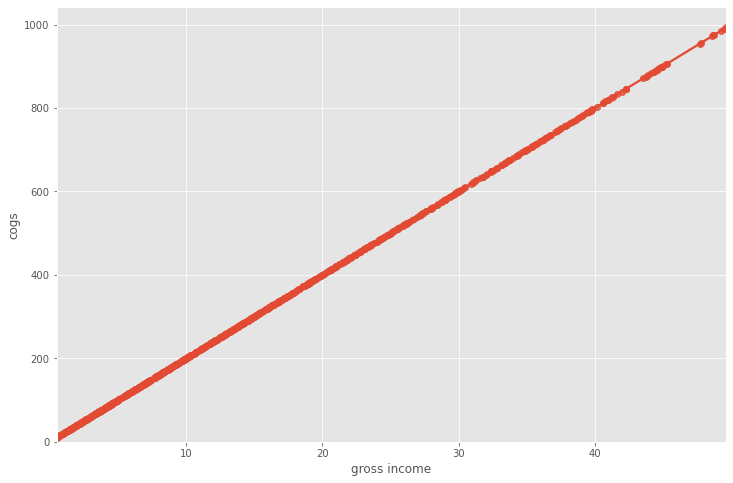

In [19]:
sns.regplot(x='gross income', y='cogs', data=df)
plt.ylim(0,)

(0.0, 10.3)

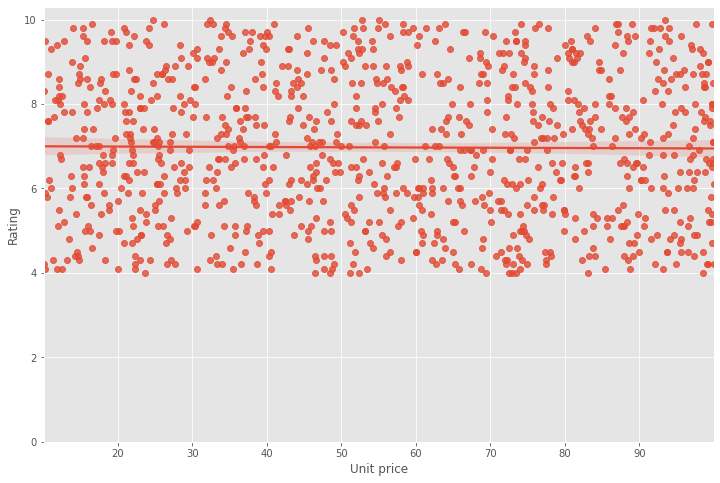

In [20]:
sns.regplot(x='Unit price', y='Rating', data=df)
plt.ylim(0,)